# MenoBalance AI - Polished EDA for 5-Dataset Integration

This notebook provides comprehensive exploratory data analysis for the unified 5-dataset cohort (SYNTHEA, UKBB, NHANES, SWAN, Wearables).


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load the unified 5-dataset cohort
print("Loading unified 5-dataset cohort...")
df = pd.read_csv("../data/clean/combined_cleaned_5src.csv", low_memory=False)

print(f"Dataset shape: {df.shape}")
print(f"Data sources: {df['data_source'].value_counts().to_dict()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic info
print("\nDataset Info:")
print(df.info())


Loading unified 5-dataset cohort...
Dataset shape: (8000, 1084)
Data sources: {'NHANES': 3000, 'SWAN': 2000, 'SYNTHEA': 1000, 'UKBB': 1000, 'Wearables': 1000}
Memory usage: 175.75 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 1084 entries, participant_id to estradiol_SWAN
dtypes: bool(5), float64(567), int64(3), object(509)
memory usage: 65.9+ MB
None


## 1. Dataset Overview and Data Source Distribution


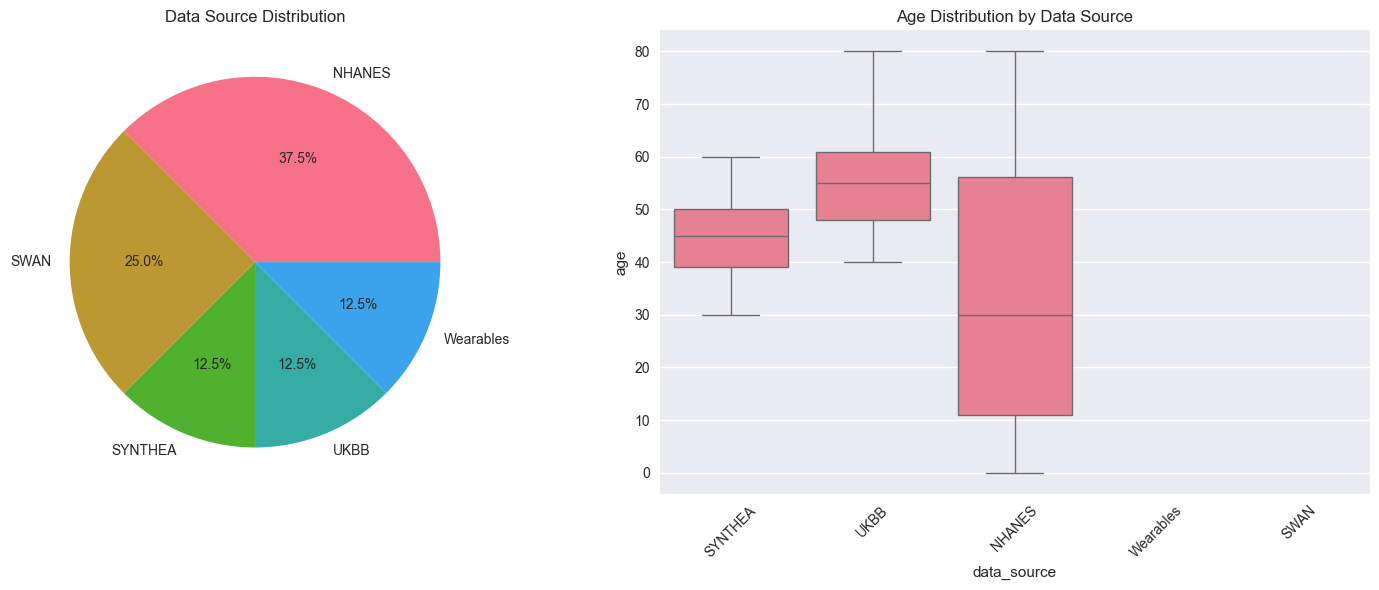

In [3]:
# Data source distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Data source counts
data_source_counts = df['data_source'].value_counts()
axes[0].pie(data_source_counts.values, labels=data_source_counts.index, autopct='%1.1f%%')
axes[0].set_title('Data Source Distribution')

# Age distribution by data source
sns.boxplot(data=df, x='data_source', y='age', ax=axes[1])
axes[1].set_title('Age Distribution by Data Source')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
